In [3]:
from __future__ import division, print_function

import requests
from bs4 import BeautifulSoup
from selenium import webdriver


import pandas as pd
import numpy as np

from IPython.core.display import HTML, Image

# Scraping a webpage

Here's a link to the Box Office Mojo page for Jurrasic Park. See if you can scrape the following information:
- Title
- Domestic Total Gross
- Distributor
- MPAA rating

In [171]:
url = 'http://www.boxofficemojo.com/movies/?id=jurassicpark.htm'

In [17]:
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page)

In [32]:
title_string = soup.find('title').text
title = str(title_string.split('(')[0].strip())
title

'Jurassic Park'

In [38]:
# Regular expressions (aka RegEx or re) matches patterns in your strings
# Use it to find text that is very similar to what you wrote
import re

In [69]:
item = soup.find(text=re.compile("Distributor"))

In [70]:
item

u'Distributor: '

In [72]:
item.findNextSibling()

u'Universal'

In [74]:
def get_soup_from_url(url):
    '''Returns Beautiful Soup for a given webpage'''
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page)
    
    return soup

In [86]:
def get_movie_info(url):
    '''Takes in a movie's URL and scrapes that webpage using Beautiful Soup
    
    Returns a list of that movie's Title, Gross, Rating and Distributor
    
    
    >> url = 'http://www.boxofficemojo.com/movies/?id=jurassicpark.htm'
    >> get_movie_info(url)
    ['Jurassic Park', '$357,067,947', 'PG-13', 'Universal']
    
    
    '''
    soup = get_soup_from_url(url)
    
    results = []
    
    title_string = soup.find('title').text
    title = str(title_string.split('(')[0].strip())
    
    results.append(title)
    
    categories = ['Domestic Total Gross', 'MPAA', 'Distributor']
    
    for c in categories:
        item = soup.find(text=re.compile(c))
        
        next_item = item.findNextSibling()
        
        parsed_item = next_item.text.encode('ascii') #This conversion from unicode to ascii lets Python 2 read the strings 
        
        results.append(parsed_item)
        
    return results  

In [172]:
get_movie_info(url)

['Jurassic Park', '$357,067,947', 'PG-13', 'Universal']

# Scraping a few webpages

Let's say we want to get that same information for several movies at once. Here's a link to the top 100 movies from 1993. Use this table to generate a list of URLs from each movie. 



In [90]:
top_100_url = 'http://www.boxofficemojo.com/yearly/chart/?yr=1993&p=.htm'
soup_100= get_soup_from_url(top_100_url)

In [132]:
links = []
for item in soup_100.find_all('a', href=re.compile("/movies/")):
    tail_link = item['href']
    link = 'http://www.boxofficemojo.com' + tail_link
    links.append(link)

In [134]:
links[:5]

['http://www.boxofficemojo.com/movies/?id=pixar2015.htm',
 'http://www.boxofficemojo.com/movies/?id=jurassicpark.htm',
 'http://www.boxofficemojo.com/movies/?id=mrsdoubtfire.htm',
 'http://www.boxofficemojo.com/movies/?id=fugitive.htm',
 'http://www.boxofficemojo.com/movies/?id=firm.htm']

In [138]:
links.pop(0) #remove the first Pixar item from the list of links

'http://www.boxofficemojo.com/movies/?id=pixar2015.htm'

### Reusing your code

See if you can the code you wrote for Jurrasic Park into a function to grab Title, Gross, Distributor, and MPAA rating for each movie on the top 100.  

In [ ]:
table = []
for url in links:
    info = get_movie_info(url)
    table.append(info)

In [141]:
table[:5]

[['Jurassic Park', '$357,067,947', 'PG-13', 'Universal'],
 ['Mrs. Doubtfire', '$219,195,243', 'PG-13', 'Fox'],
 ['The Fugitive', '$183,875,760', 'PG-13', 'Warner Bros.'],
 ['The Firm', '$158,348,367', 'R', 'Paramount'],
 ['Sleepless in Seattle', '$126,680,884', 'PG', 'TriStar']]

# Bonus: Turn the data you collected into a dataframe. 
Plot the Domestic total gross by MPAA rating, then by Distributor

In [151]:
df = pd.DataFrame(table, columns = ['Title', 'Domestic Gross', 'Rating', 'Distributor'])

In [152]:
df.head()

,Title,Domestic Gross,Rating,Distributor
0,Jurassic Park,"$357,067,947",PG-13,Universal
1,Mrs. Doubtfire,"$219,195,243",PG-13,Fox
2,The Fugitive,"$183,875,760",PG-13,Warner Bros.
3,The Firm,"$158,348,367",R,Paramount
4,Sleepless in Seattle,"$126,680,884",PG,TriStar


In [155]:
df['Domestic Gross'] = df['Domestic Gross'].apply(lambda x: x.replace('$',''))
df['Domestic Gross'] = df['Domestic Gross'].apply(lambda x: x.replace(',',''))
df['Domestic Gross'] = df['Domestic Gross'].apply(lambda x: int(x))

In [156]:
df.head()

,Title,Domestic Gross,Rating,Distributor
0,Jurassic Park,357067947,PG-13,Universal
1,Mrs. Doubtfire,219195243,PG-13,Fox
2,The Fugitive,183875760,PG-13,Warner Bros.
3,The Firm,158348367,R,Paramount
4,Sleepless in Seattle,126680884,PG,TriStar


In [165]:
%matplotlib inline
df.groupby('Rating')[['Domestic Gross']].sum()

,Domestic Gross
Rating,
G,114649142
PG,1132420207
PG-13,1727437616
R,1519243482


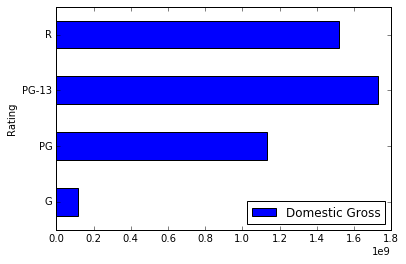

In [167]:
df.groupby('Rating')[['Domestic Gross']].sum().plot(kind='barh')

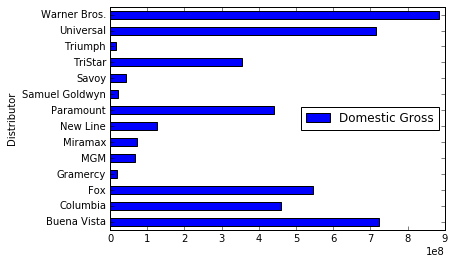

In [168]:
df.groupby('Distributor')[['Domestic Gross']].sum().plot(kind='barh')